<a href="https://colab.research.google.com/github/shaeyosh/lab2/blob/main/Lab2_Yoshida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [2]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

## Lab introduction

We will be working with the IMDB movies data set from the vega data sets. We will ask the following questions:

1.  Do movies that are more expensive to produce make more money worldwide?
2.  Do movie ratings (IMDB or Rotten Tomatoes) help predict the worldwide gross of a movie?




## Import and set up the data set

### Load the data



In [3]:
from vega_datasets import data

Create a Pandas data frame for the movies data set.

In [4]:
df = data.movies()

For simplicity, remove any rows that have NaN's from the data frame.

In [5]:
df = df.dropna()

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

##### Solution

* this code will display the head of the data



In [6]:
df.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
1064,12 Rounds,12234694.0,18184083.0,8283859.0,20000000.0,Mar 27 2009,PG-13,108.0,20th Century Fox,Original Screenplay,Action,Contemporary Fiction,Renny Harlin,28.0,5.4,8914.0
1074,2012,166112167.0,766812167.0,50736023.0,200000000.0,Nov 13 2009,PG-13,158.0,Sony Pictures,Original Screenplay,Action,Science Fiction,Roland Emmerich,39.0,6.2,396.0
1090,300,210614939.0,456068181.0,261252400.0,60000000.0,Mar 09 2007,R,117.0,Warner Bros.,Based on Comic/Graphic Novel,Action,Historical Fiction,Zack Snyder,60.0,7.8,235508.0
1095,3:10 to Yuma,53606916.0,69791889.0,51359371.0,48000000.0,Sep 02 2007,R,117.0,Lionsgate,Remake,Western,Historical Fiction,James Mangold,89.0,7.9,98355.0
1107,88 Minutes,16930884.0,32955399.0,11385055.0,30000000.0,Apr 18 2008,R,106.0,Sony Pictures,Original Screenplay,Thriller/Suspense,Contemporary Fiction,Jon Avnet,5.0,5.9,31205.0


* The head displays information from the data frame allowing us to learn more about the data within the data set. 

## Exploratory data analysis

##### $\rightarrow$ Make a pair plot to explore relationships between the numerical variables in the data set. 

##### Solution

* Here I have created a pair plot using the seaborn library pairplot function.

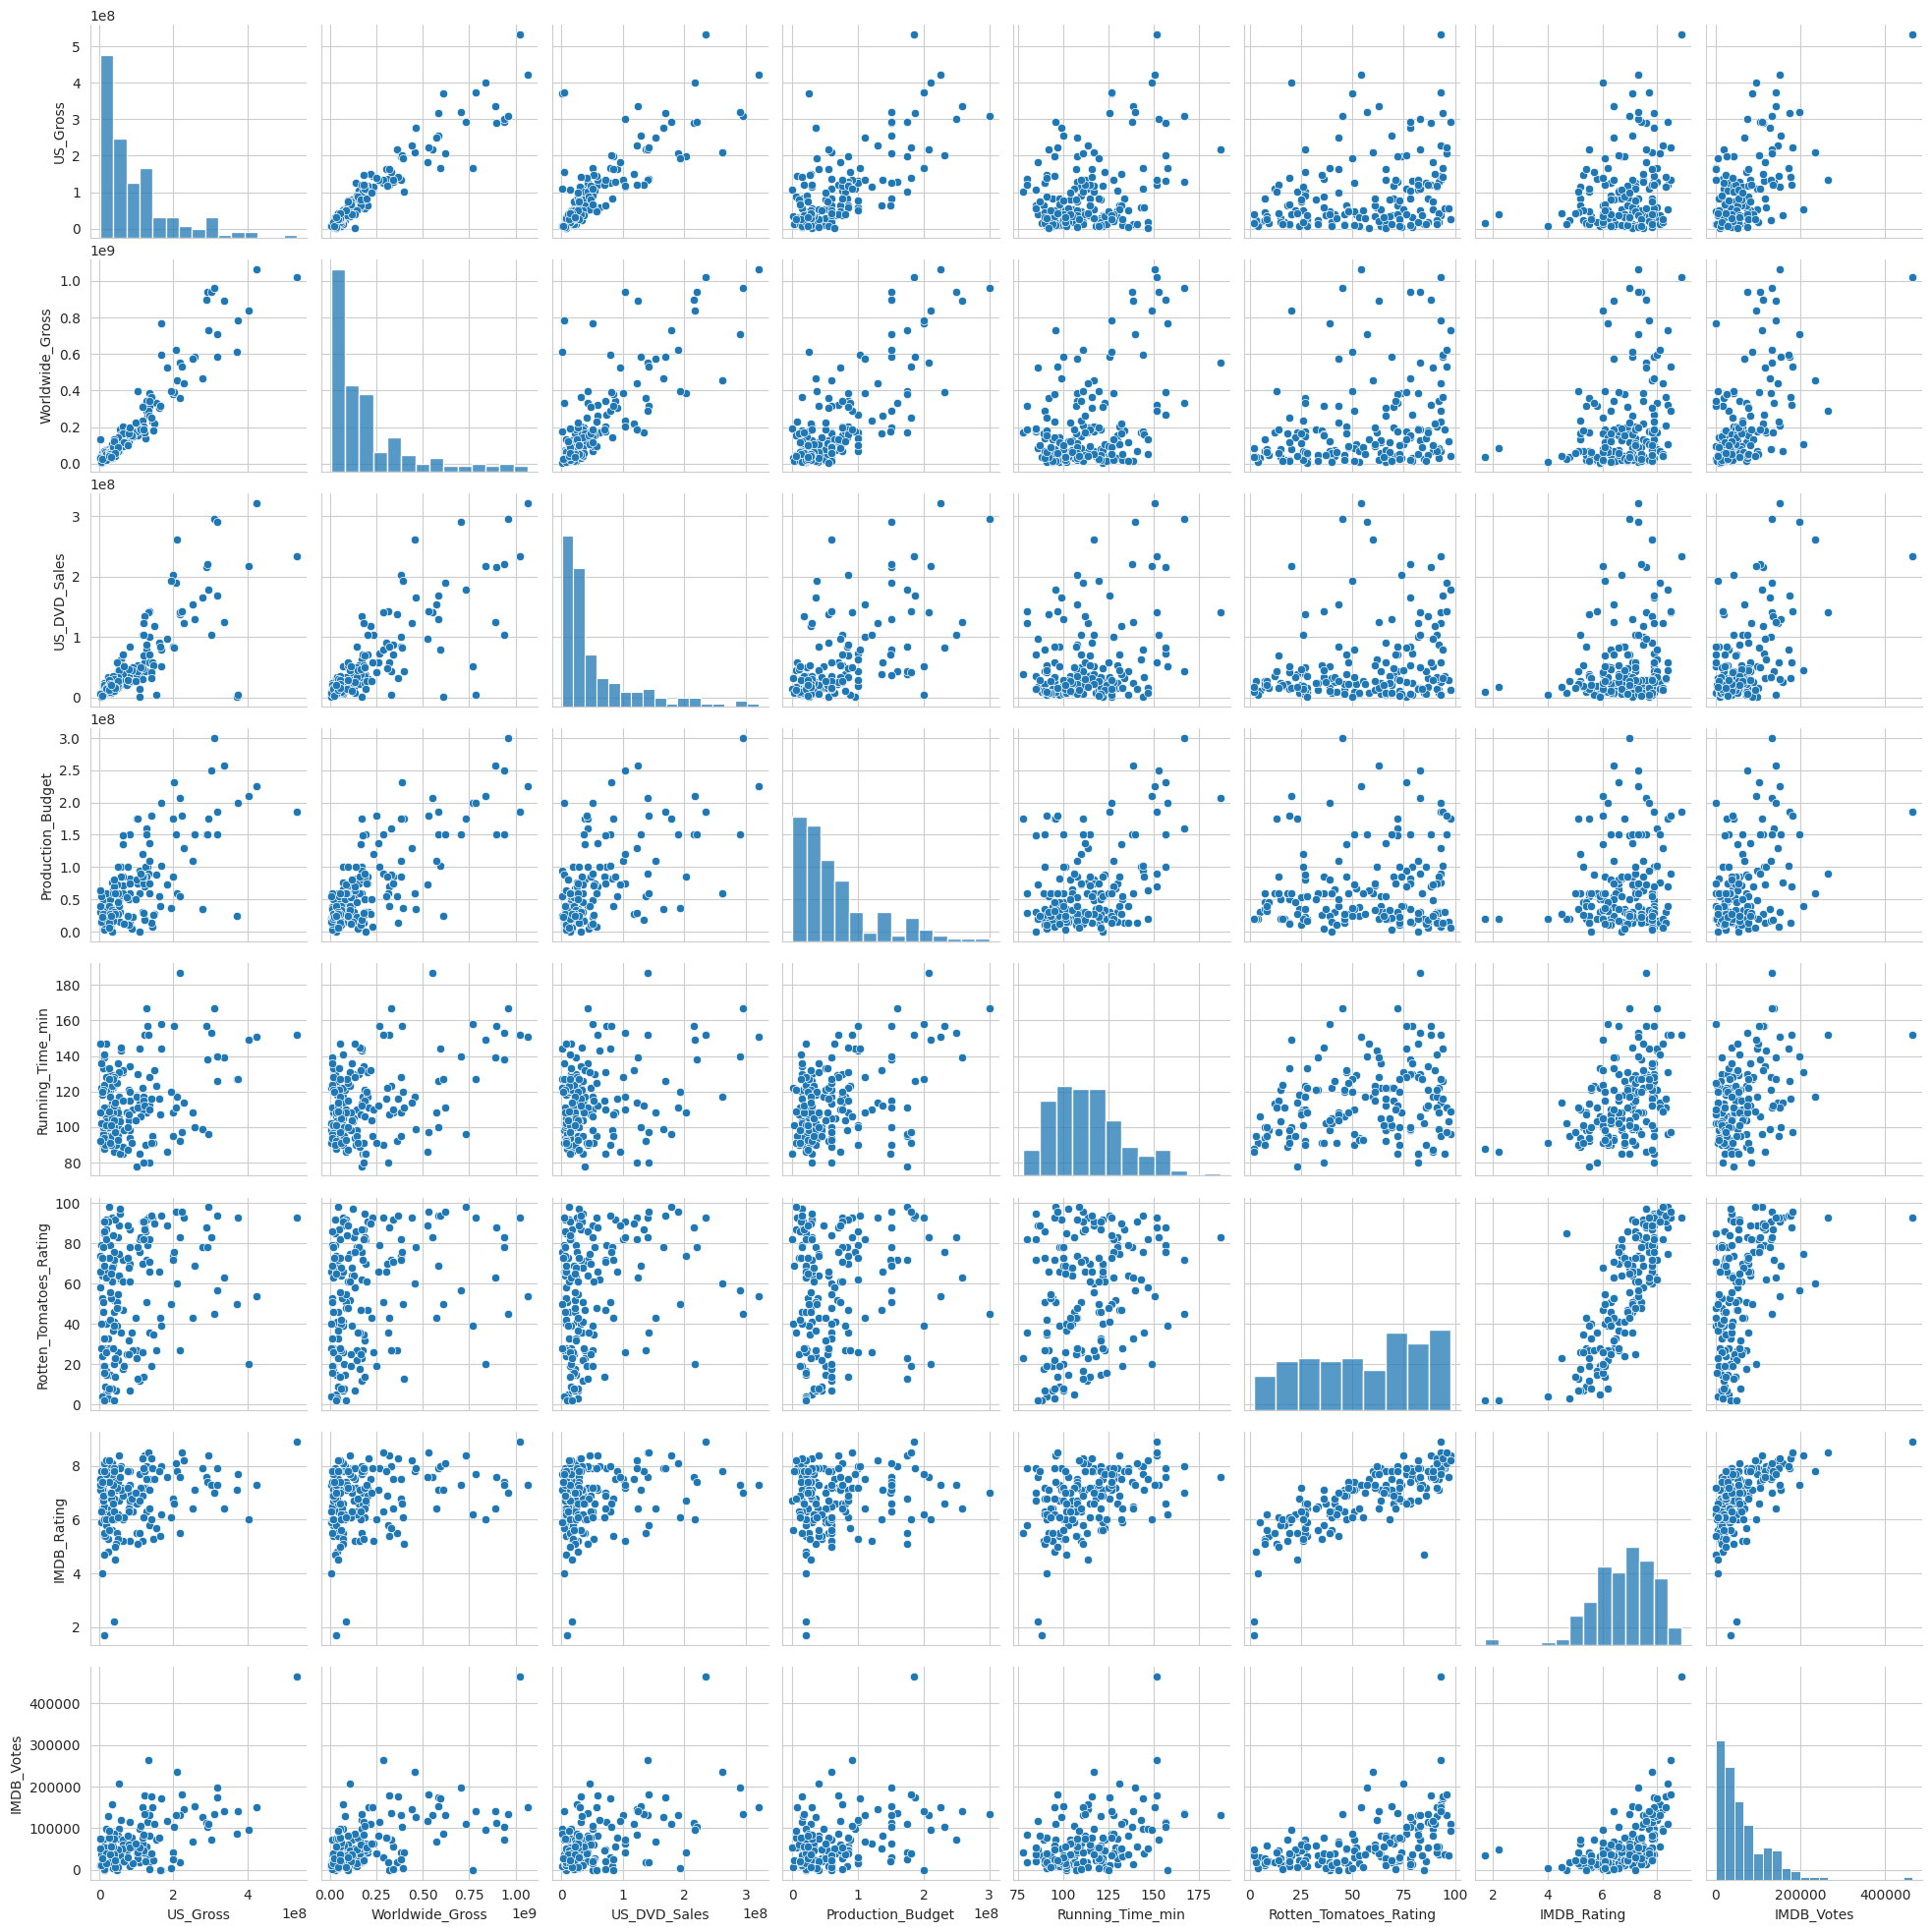

In [7]:
sns.pairplot(df)

* The pairplot code produces a range of graphs that display the general relationships between two variables based off of the data in the dataframe.

##### $\rightarrow$ Plot the correlation matrix to explore relationships between the numerical variables.

##### Solution

* The df.corr function allows me to create the matrix shown below.

In [26]:
df.corr()

<ipython-input-26-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Running_Time_min,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
US_Gross,1.000000,0.945884,0.805957,0.716107,0.324815,0.272995,0.249241,0.626820
Worldwide_Gross,0.945884,1.000000,0.805460,0.786412,0.415510,0.273585,0.253299,0.589141
US_DVD_Sales,0.805957,0.805460,1.000000,0.603094,0.299024,0.237974,0.242352,0.557508
Production_Budget,0.716107,0.786412,0.603094,1.000000,0.414008,0.138919,0.121940,0.403616
Running_Time_min,0.324815,0.415510,0.299024,0.414008,1.000000,0.266890,0.402948,0.413505
Rotten_Tomatoes_Rating,0.272995,0.273585,0.237974,0.138919,0.266890,1.000000,0.799496,0.493600
IMDB_Rating,0.249241,0.253299,0.242352,0.121940,0.402948,0.799496,1.000000,0.560185
IMDB_Votes,0.626820,0.589141,0.557508,0.403616,0.413505,0.493600,0.560185,1.000000


* The values displayed in this correlation matrix are the correlation values (R) between each of the different data varaibles we have listen in the data frame. the closer the value is to -1 or 1, the greater the strength of the correlation between the two variables listed are. 

* Here I have used the sns.heatmap function to create a visual for the correlation matrix chart shown above.

<ipython-input-27-038fc9e360ab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

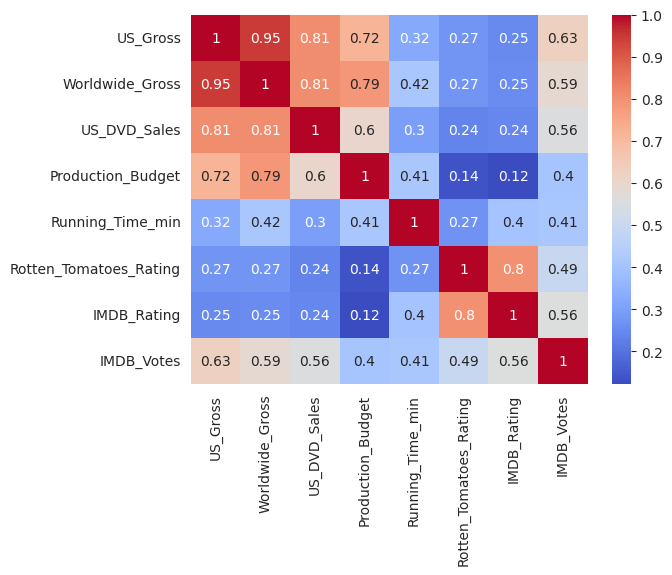

In [27]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

* This code creates a heat map of the values provided in my correlation matrix which helps to visualize the relationships a bit better.

## Modeling

### Worldwide gross and production budget

In [9]:
df_worldwide_gross = df['Worldwide_Gross']

In [10]:
df_production_budget = df['Production_Budget']

##### $\rightarrow$ Complete the following:

1.  Make a scatter plot of the production budget and worldwide gross of the movie. Describe the relationship.

2.  Perform a regression analysis predicting worldwide gross from production budget. 

    a. Use graphical and numerical methods to assess the fit of a simple linear regression model.
    
    b. Determine whether a quadratic regression model is better than a simple linear regression model.

### Solution

#1.
 The relationship between production budget and worldwide gross seems to hold a positive correlation when looking at the data on a large scale. This means that the higher the production budget is, the higher the worldwide gross generally is. However I found that when changing the x limit to zoom in closer to the dense section of points, the positive correlation, although it is still apparent, no longer appears as strong.
* The code listed below is used to make a scatterplot using the Matplotlib library.

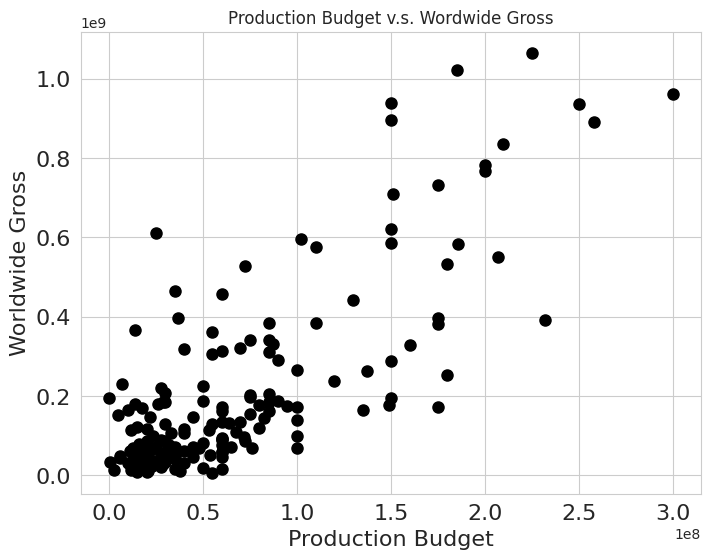

In [11]:
plt.figure(figsize=(8,6))

plt.plot(df_production_budget, df_worldwide_gross, 'ko', ms = 8)

plt.xlabel('Production Budget', fontsize = 16)
plt.ylabel('Worldwide Gross', fontsize = 16)

plt.title('Production Budget v.s. Wordwide Gross')
plt.tick_params(labelsize = 16)

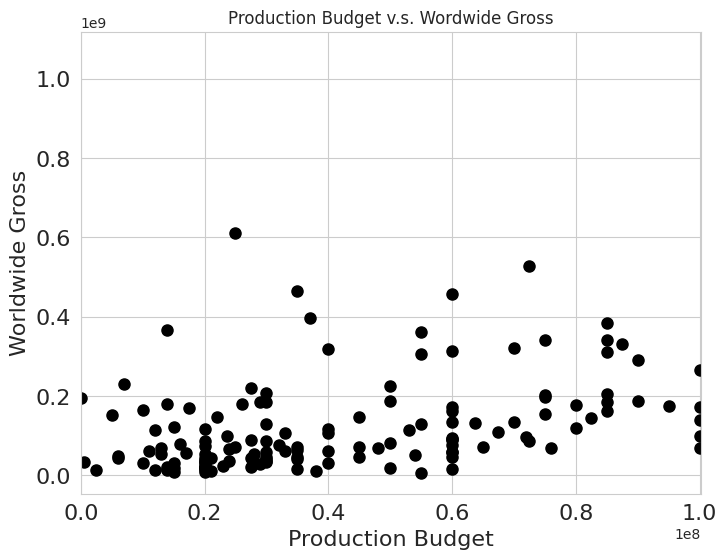

In [12]:
plt.figure(figsize=(8,6))

plt.plot(df_production_budget, df_worldwide_gross, 'ko', ms = 8)

plt.xlabel('Production Budget', fontsize = 16)
plt.ylabel('Worldwide Gross', fontsize = 16)

plt.xlim(0,100_200_000)

plt.title('Production Budget v.s. Wordwide Gross')
plt.tick_params(labelsize = 16)

* By using this code the scatterplots shown above are generated with the data specified in the coding above, which is production budget and worldwide gross.

#2.

##a.
* In this step I added in the sns.regplot command to the scatterplot generating code.

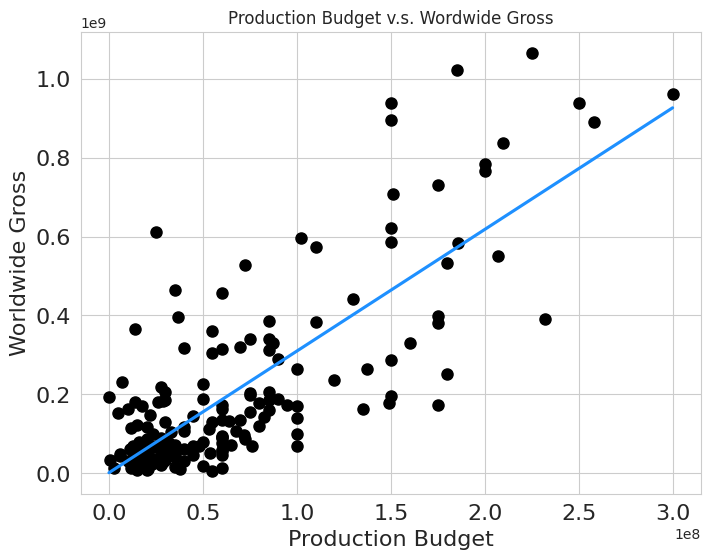

In [13]:
plt.figure(figsize=(8,6))

plt.plot(df_production_budget, df_worldwide_gross, 'ko', ms = 8)

sns.regplot(x = df_production_budget, y = df_worldwide_gross, color = 'dodgerblue', data = df, ci = False, scatter = False)

plt.xlabel('Production Budget', fontsize = 16)
plt.ylabel('Worldwide Gross', fontsize = 16)

plt.title('Production Budget v.s. Wordwide Gross')
plt.tick_params(labelsize = 16)


*the sns.regplot command allows me to make a linear regression of the data shown on the scatter plot.

* using the smf.ols command I am able to fit the linear regression model above.

In [14]:
model1 = smf.ols(formula='df_production_budget ~ df_worldwide_gross', data=df).fit()

* I am then able to take the linear fit and look at information on the graphs correlation using the model.summary command.

In [15]:
print(model1.summary())

                             OLS Regression Results                             
Dep. Variable:     df_production_budget   R-squared:                       0.618
Model:                              OLS   Adj. R-squared:                  0.616
Method:                   Least Squares   F-statistic:                     278.8
Date:                  Sun, 07 May 2023   Prob (F-statistic):           7.95e-38
Time:                          21:32:48   Log-Likelihood:                -3279.1
No. Observations:                   174   AIC:                             6562.
Df Residuals:                       172   BIC:                             6569.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

* When looking at R-squared, which is a value that tells us how well the fit matches the data, the linear regression model has a value of 0.618. The values can range between 0 and 1, 1 being an extremely good fit. With this in mind, the linear regression fits the data moderately well. 

##b.

* Here I have used the same scatter plot coding as shown above in part a, but have added in "order=2" to the sns.regplot command in order to make it a quadradic fit instead of a linear fit.

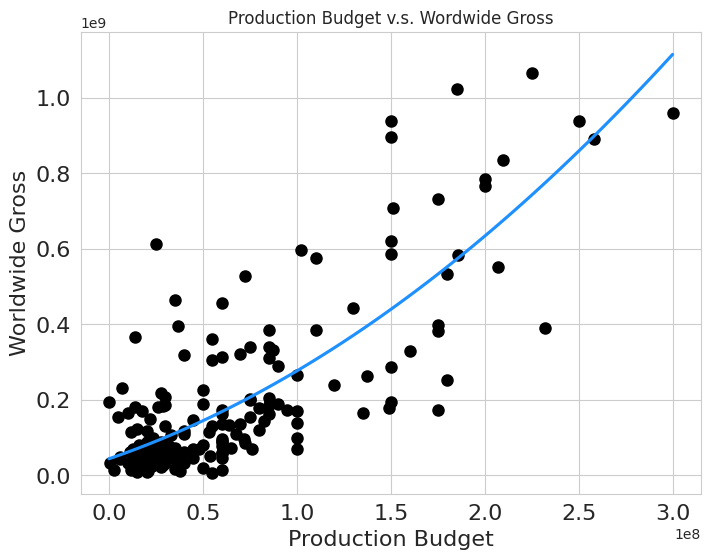

In [16]:
plt.figure(figsize=(8,6))

plt.plot(df_production_budget, df_worldwide_gross, 'ko', ms = 8)

sns.regplot(x=df_production_budget, y=df_worldwide_gross, color='dodgerblue', order=2, data=df, ci=False, scatter=False)

plt.xlabel('Production Budget', fontsize = 16)
plt.ylabel('Worldwide Gross', fontsize = 16)

plt.title('Production Budget v.s. Wordwide Gross')
plt.tick_params(labelsize = 16)


* I then used the same smf.ols command to fit the quadratic regression, however in order to create a fit for the quadratic aspect of the model I added in the np.power command to create a quadratic element in the model fitting.

In [17]:
model2 = smf.ols(formula='df_worldwide_gross ~ df_production_budget + np.power(df_production_budget, 2)', data=df).fit()

* using this fitted model I was able to print a model summary for the quadratic regression and obtain my R-squared value.

In [18]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:     df_worldwide_gross   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     286.4
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.88e-38
Time:                        21:32:49   Log-Likelihood:                -3515.3
No. Observations:                 174   AIC:                             7035.
Df Residuals:                     172   BIC:                             7041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

* The R-squared value for the quadratic regression is 0.625 which is higher than the lienar fit R-squared value of 0.618. Due to this I believe that the quadratic regression model is a slightly better fit for the data given when compared to the linear regression model. 

### Incorporating movie ratings

##### $\rightarrow$ Complete the following:

1.  Perform a regression analysis predicting worldwide gross from production budget and movie ratings from Rotten Tomatoes and IMDB.

    a. Does the addition of either the Rotten Tomatoes or IMDB ratings to the model containing production budget improve the prediction of worldwide gross?
    
    b. Is it useful to include both Rotten Tomatoes and IMDB ratings as predictors in the model?

### Solution

#1.

* Here I have used the sns.pairplot function to group together variables and create scatterplots of said variables. As shown below, the coding that is written out creates scatter plots for the IMDB ratings and Production Budget vs. Wordlwide Gross as well as a scatterplot for the independent data combined vs. the worldwide gross. 

Text(817.1903935185186, 0.5, 'Worldwide Gross')

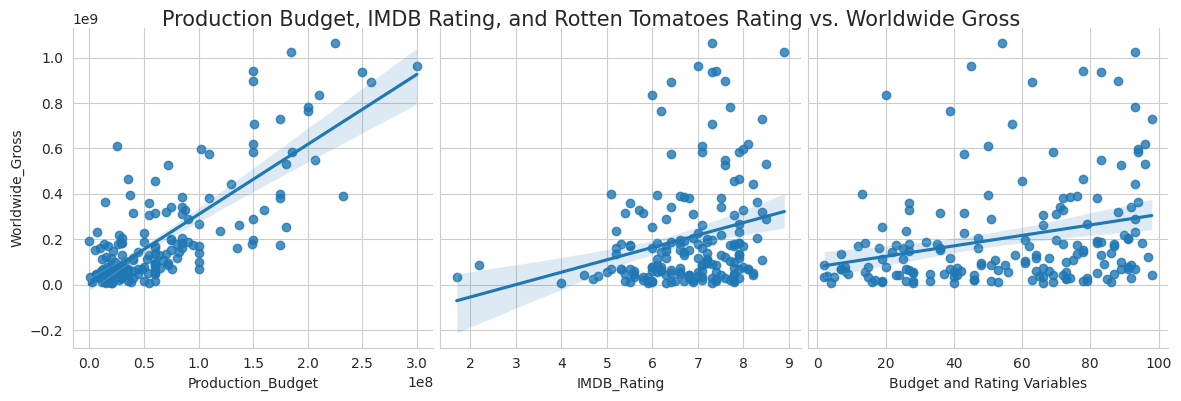

In [19]:
sns.pairplot(data=df, x_vars=['Production_Budget', 'IMDB_Rating', 'Rotten_Tomatoes_Rating'], y_vars='Worldwide_Gross', kind='reg', height=4)

plt.suptitle('Production Budget, IMDB Rating, and Rotten Tomatoes Rating vs. Worldwide Gross', fontsize=15)
plt.xlabel('Budget and Rating Variables', fontsize=10)
plt.ylabel('Worldwide Gross', fontsize=15)

* The code explained above creates these graphs which contian linear regressions to map out the correlation between the included variables.

* Using the smf.ols function I am creating a linear fit for the regressions shown above.

In [20]:
model3 = smf.ols(formula='Worldwide_Gross ~ Production_Budget + IMDB_Rating + Rotten_Tomatoes_Rating', data=df).fit()

* I then use these fittings to create a summary of the model.

In [21]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:        Worldwide_Gross   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.47e-38
Time:                        21:32:51   Log-Likelihood:                -3509.8
No. Observations:                 174   AIC:                             7028.
Df Residuals:                     170   BIC:                             7040.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.49

##a.
* As shown in the data chart above, the R-square value is 0.648 which is higher than both previous linear and quadratic regressions done earlier in this lab. This leads me to conclude that the addition of the movie ratings does improve the prediciton of worldwide gross.

* Here I used the same code as previously to create a simple scatter plot between the two different rating types. I did so in order to compare the data from the sets and to see if they differed enough to have a large impact on the accuracy of my prediciton for worldwide gross should the Rotten Tomatoes rating be removed.

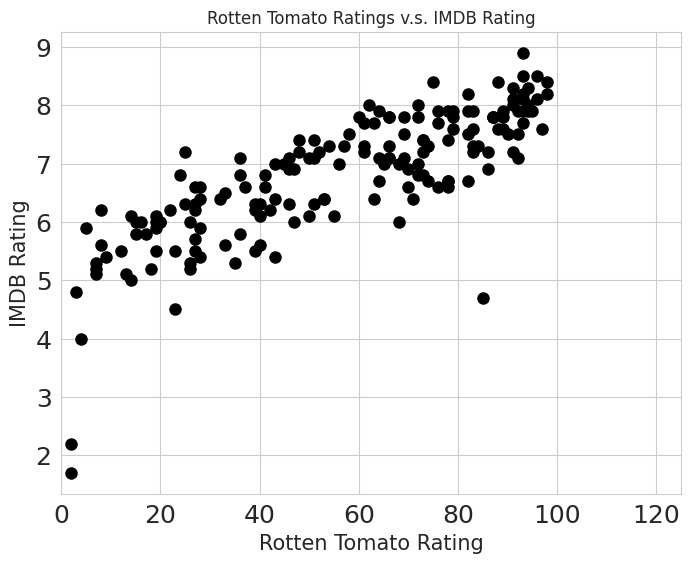

In [22]:
df_rotten = df['Rotten_Tomatoes_Rating']
df_IMDB = df['IMDB_Rating']

plt.figure(figsize=(8,6))

plt.plot(df_rotten, df_IMDB, 'ko', ms = 8)

plt.xlabel('Rotten Tomato Rating', fontsize = 15)
plt.ylabel('IMDB Rating', fontsize = 15)

plt.xlim(0,125)

plt.title('Rotten Tomato Ratings v.s. IMDB Rating')
plt.tick_params(labelsize = 18)

* The code explained above creates this scatterplot which maps the relationship between ratings.

##b.
* I feel that it was unnessesary to include the rotten tomatoes rating data becuase as shown in the scatterplot above, they follow the same general trend. I feel that including two forms of ratings as opposed to just one would not greatly increase the prediction of the worldwide gross.

#In Conclusion:
After doing my analysis of the data provided in the dataframe I have come to the conclusion that in general the higher the movie budget is, the higher the worldwide gross is. Additonally when adding in movie ratings to my analysis, I've found that it does improve the accuracy of the predictability of worldwide gross by about .02.